# (outlined) North Atlantic Hurricanes

In [184]:
from pathlib import Path
import pandas as pd
import numpy as np

DATA_FOLDER = Path("..") / "data"
DATA_FILEPATH = DATA_FOLDER / "hurricanes.csv"
# Execute on cloud platform? (e.g. colab), try this path instead
# DATA_FILEPATH = "https://raw.githubusercontent.com/jeepchinnawat/edumat-book/main/data/hurricanes.csv"

hurricanes = pd.read_csv(DATA_FILEPATH)
hurricanes

,RowNames,Number,Name,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
0,1,430,NOTNAMED,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80
1,2,432,NOTNAMED,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80
2,3,433,NOTNAMED,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105
3,4,436,NOTNAMED,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120
4,5,437,NOTNAMED,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
332,333,1227,GORDON,2000,1,25.2,-85.4,26.1,-84.9,28.0,-83.8,70
333,334,1229,ISAAC,2000,0,14.3,-33.2,26.6,-54.2,39.7,-47.9,120
334,335,1230,JOYCE,2000,0,12.4,-38.8,12.2,-42.5,10.5,-48.6,80
335,336,1231,KEITH,2000,0,17.9,-86.4,17.9,-87.2,22.6,-97.9,120


## Introductory Data Inspection

In [109]:
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RowNames  337 non-null    int64  
 1   Number    337 non-null    int64  
 2   Name      337 non-null    object 
 3   Year      337 non-null    int64  
 4   Type      337 non-null    int64  
 5   FirstLat  337 non-null    float64
 6   FirstLon  337 non-null    float64
 7   MaxLat    337 non-null    float64
 8   MaxLon    337 non-null    float64
 9   LastLat   337 non-null    float64
 10  LastLon   337 non-null    float64
 11  MaxInt    337 non-null    int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 31.7+ KB


In [110]:
features = ['FirstLat','FirstLon','MaxLat','MaxLon','LastLat','LastLon','MaxInt']
label = ['Type']

In [101]:
hurricanes[features].describe()

,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,23.437982,-65.568546,27.198220,-68.650742,34.550148,-64.895252,94.572700
std,7.592829,17.665280,7.724416,16.875719,10.175473,22.074126,23.287442
min,10.300000,-96.700000,10.300000,-98.400000,10.000000,-99.200000,65.000000
25%,16.600000,-80.000000,21.700000,-82.500000,28.700000,-83.500000,75.000000
50%,23.300000,-65.300000,27.300000,-68.400000,35.500000,-65.600000,90.000000
75%,28.700000,-53.400000,33.000000,-56.800000,42.100000,-48.500000,110.000000
max,46.000000,-23.000000,48.000000,-7.500000,61.100000,-5.000000,165.000000


<Axes: >

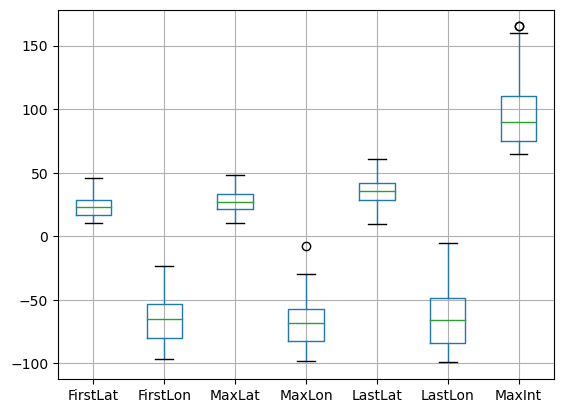

In [108]:
hurricanes[features].boxplot()

In [107]:
# hurricanes[features].hist(bins=30, figsize=(15,10))

## Feature Selection

### Univariate Selection

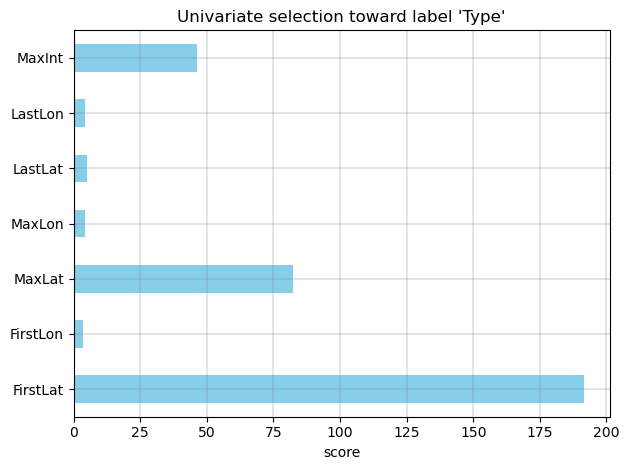

In [178]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

selector = SelectKBest(f_classif, k=2)
selector.fit(hurricanes[features], hurricanes[label[0]])
scores = selector.scores_

features_scores = pd.Series(scores, index=features)

fig, ax = plt.subplots()
features_scores.plot.barh(ax=ax, color='skyblue')
ax.grid(True, which='both', color='grey', linewidth=0.3)
ax.set_title("Univariate selection toward label 'Type'")
ax.set_xlabel("score")
fig.tight_layout()
plt.show()

### Random Forest's Feature Importance

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameters for GridSearch
param_grid = {
'n_estimators': [10, 20, 30, 40],
'max_depth': [2,4,6, 8],
'min_samples_split': [2, 4],
    'max_features': [1,2,4,7]
}

# rf = RandomForestClassifier(random_state=20, n_jobs=2,min_samples_leaf=1)
# # Grid search with cross-validation
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
# cv_rf.fit(X_train, y_train)
# print(f"Best parameters: {cv_rf.best_params_}")

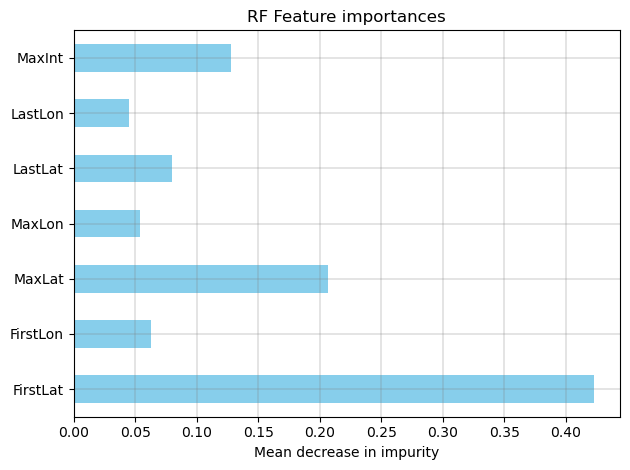

In [179]:
rf = RandomForestClassifier(random_state=20, n_jobs=2, min_samples_leaf=1,
                            max_depth=4, max_features=2, min_samples_split=2, n_estimators=40)
rf.fit(hurricanes[features], hurricanes[label[0]])

importances = rf.feature_importances_
features_scores = pd.Series(importances, index=features)

fig, ax = plt.subplots()
features_scores.plot.barh(ax=ax, color='skyblue')
ax.grid(True, which='both', color='grey', linewidth=0.3)
ax.set_title("RF Feature importances")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [176]:
selected_features = ["FirstLat","MaxLat"]

## Stratified Data Splitting

<Axes: xlabel='Type'>

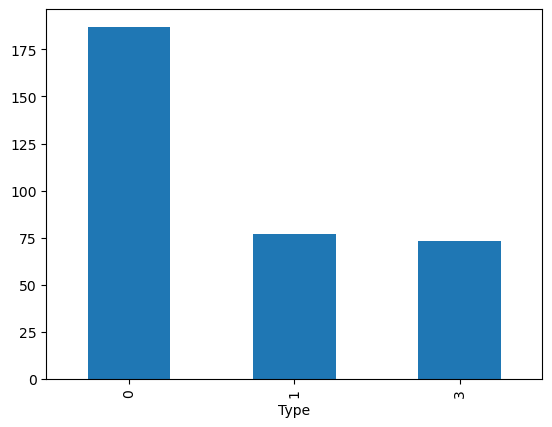

In [89]:
hurricanes.groupby('Type').Type.count().plot(kind='bar')

In [177]:
from sklearn.model_selection import train_test_split

X,y = hurricanes[selected_features].copy(), hurricanes["Type"].copy()
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.7, random_state=20, stratify=y)

## Classification Model

### Classification Report

### Choices of Evaluation Metrics

## Next...?
- Re-classify the dataset with the model to have a simulated dataset (perfectly separable)
- Adding uncertainty(noise) to features of the simulated dataset
- Predicted a noisy dataset and compare to the simulated
- Expected: Affecting data points in the vicinity of decision boundaries

In [183]:
# tropical_hurricanes = hurricanes.copy()
# # set type 3 to type 1 for binary classification problem
# tropical_hurricanes[tropical_hurricanes['Type'] == 3] = 1
# # check that there are only type 0 and type 1
# tropical_hurricanes['Type'].unique()

In [182]:
# tropical_hurricanes['Type'].groupby(tropical_hurricanes['Type']).count()